In [0]:
import torch
import torchvision
import torchvision.transforms as transforms
%matplotlib inline
%load_ext autoreload
%autoreload 2
from fastai.vision import *

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
from fastai.vision import ImageDataBunch, URLs
from fastai.vision import get_transforms, imagenet_stats, untar_data, get_image_files

# 1. Get the data:
    1.1 Download images
    1.2 Unpack & Preprocess
    1.3 Train / Val Split!!!

**First way**. Using the folowing code in Google Images result page console



```
urls=Array.from(document.querySelectorAll('.rg_i')).map(el=> el.hasAttribute('data-src')?el.getAttribute('data-src'):el.getAttribute('data-iurl'));
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```

we can download images we searched for.

Next we want to rename the files to our target classes (in my case these are black, white and brown bears).

**Second way**. To use google_images_download library.

https://google-images-download.readthedocs.io/en/latest/examples.html

**Third way**. Like  Jeremy Howard from fast.ai shows in his Lesson 2

https://course.fast.ai/videos/?lesson=2

In [0]:
path = Path('/content/drive/My Drive/DSML/bears/')
#I'll execute this code later on every label/bear. Here it's just in case I'll run the code on existing database without a need to download a new one.

**Black bear**. Create folder, specify a file, define a path and destination for download.

In [0]:
folder = 'blackbear'
file = 'blackbear.txt'

In [0]:
path = Path('/content/drive/My Drive/DSML/bears')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
download_images(path/file, dest, max_pics=150)

Error https://ww.mtpr.org/sites/kufm/files/styles/medium/public/201906/grizzly-killed-05-30-19_MontanaFWP.jpg HTTPSConnectionPool(host='ww.mtpr.org', port=443): Max retries exceeded with url: /sites/kufm/files/styles/medium/public/201906/grizzly-killed-05-30-19_MontanaFWP.jpg (Caused by SSLError(CertificateError("hostname 'ww.mtpr.org' doesn't match either of '*.drupal.publicbroadcasting.net', 'drupal.publicbroadcasting.net'",),))


**White bear**. Create folder, specify a file, define a path and destination for download.

In [0]:
folder = 'whitebear'
file = 'whitebear.txt'

In [0]:
path = Path('/content/drive/My Drive/DSML/bears')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
download_images(path/file, dest, max_pics=150)

Error https://www.washingtonpost.com/resizer/gaqHbQeSsz2tu9MUhhr4pXWtoWs=/1484x0/arc-anglerfish-washpost-prod-washpost.s3.amazonaws.com/public/AV26F7W6SUI6PCPI5XWBMN4QCA.jpg HTTPSConnectionPool(host='www.washingtonpost.com', port=443): Read timed out. (read timeout=4)


**Brown bear**. Create folder, specify a file, define a path and destination for download.

In [0]:
folder = 'brownbear'
file = 'brownbear.txt'

In [0]:
path = Path('/content/drive/My Drive/DSML/bears')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
download_images(path/file, dest, max_pics=150)

Checking path

In [0]:
path.ls()

[PosixPath('/content/drive/My Drive/DSML/bears/whitebear.txt'),
 PosixPath('/content/drive/My Drive/DSML/bears/blackbear.txt'),
 PosixPath('/content/drive/My Drive/DSML/bears/brownbear.txt'),
 PosixPath('/content/drive/My Drive/DSML/bears/1-312.jpg'),
 PosixPath('/content/drive/My Drive/DSML/bears/burmed-6.jpg'),
 PosixPath('/content/drive/My Drive/DSML/bears/Polar_Bear.jpg'),
 PosixPath('/content/drive/My Drive/DSML/bears/chernyj-medved-1.jpg'),
 PosixPath('/content/drive/My Drive/DSML/bears/bur.jpg'),
 PosixPath('/content/drive/My Drive/DSML/bears/blackbear'),
 PosixPath('/content/drive/My Drive/DSML/bears/whitebear'),
 PosixPath('/content/drive/My Drive/DSML/bears/brownbear')]

In [0]:
classes = ['blackbear','whitebear', 'brownbear']

In [0]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

blackbear


cannot identify image file <_io.BufferedReader name='/content/drive/My Drive/DSML/bears/blackbear/00000016.jpg'>
cannot identify image file <_io.BufferedReader name='/content/drive/My Drive/DSML/bears/blackbear/00000021.jpg'>


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:967: UserWarning: Couldn't allocate palette entry for transparency
  "for transparency")


int() argument must be a string, a bytes-like object or a number, not 'tuple'
cannot identify image file <_io.BufferedReader name='/content/drive/My Drive/DSML/bears/blackbear/00000036.jpg'>
cannot identify image file <_io.BufferedReader name='/content/drive/My Drive/DSML/bears/blackbear/00000058.jpg'>
cannot identify image file <_io.BufferedReader name='/content/drive/My Drive/DSML/bears/blackbear/00000067.jpg'>
/content/drive/My Drive/DSML/bears/blackbear/00000072.JPG: Removing corrupt EXIF data
cannot identify image file <_io.BufferedReader name='/content/drive/My Drive/DSML/bears/blackbear/00000074.jpg'>
cannot identify image file <_io.BufferedReader name='/content/drive/My Drive/DSML/bears/blackbear/00000077.jpg'>
cannot identify image file <_io.BufferedReader name='/content/drive/My Drive/DSML/bears/blackbear/00000080.jpg'>
cannot identify image file <_io.BufferedReader name='/content/drive/My Drive/DSML/bears/blackbear/00000092.jpg'>
whitebear


cannot identify image file <_io.BufferedReader name='/content/drive/My Drive/DSML/bears/whitebear/00000018.jpg'>
cannot identify image file <_io.BufferedReader name='/content/drive/My Drive/DSML/bears/whitebear/00000006.jpg'>
cannot identify image file <_io.BufferedReader name='/content/drive/My Drive/DSML/bears/whitebear/00000061.jpeg'>
cannot identify image file <_io.BufferedReader name='/content/drive/My Drive/DSML/bears/whitebear/00000078.png'>
cannot identify image file <_io.BufferedReader name='/content/drive/My Drive/DSML/bears/whitebear/00000117.jpg'>


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:914: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


cannot identify image file <_io.BufferedReader name='/content/drive/My Drive/DSML/bears/whitebear/00000146.jpg'>
brownbear


In [0]:
fnames = get_image_files(path/folder)
fnames[:5]

[PosixPath('/content/drive/My Drive/DSML/bears/brownbear/00000000.jpg'),
 PosixPath('/content/drive/My Drive/DSML/bears/brownbear/00000007.jpg'),
 PosixPath('/content/drive/My Drive/DSML/bears/brownbear/00000005.jpg'),
 PosixPath('/content/drive/My Drive/DSML/bears/brownbear/00000001.jpg'),
 PosixPath('/content/drive/My Drive/DSML/bears/brownbear/00000006.jpg')]

In [0]:
data = ImageDataBunch.from_folder(path, fnames, #re stands for regex
                                   ds_tfms=get_transforms(), #transforms dataset, can randomize, augument, etc
                                   size=224, bs=64, valid_pct=0.2, num_workers=4) #bs is a batch size, i.e. the number of files we process at a time
                                   #valid_pct divides our dataset into two datasets: for training and validation (0.2 -> 80% to training & 20% to validation)

In [0]:
data = data.normalize(imagenet_stats) #imagenet_stats means we use imagenet dataset as orientation for normalization. Used for transfer learning

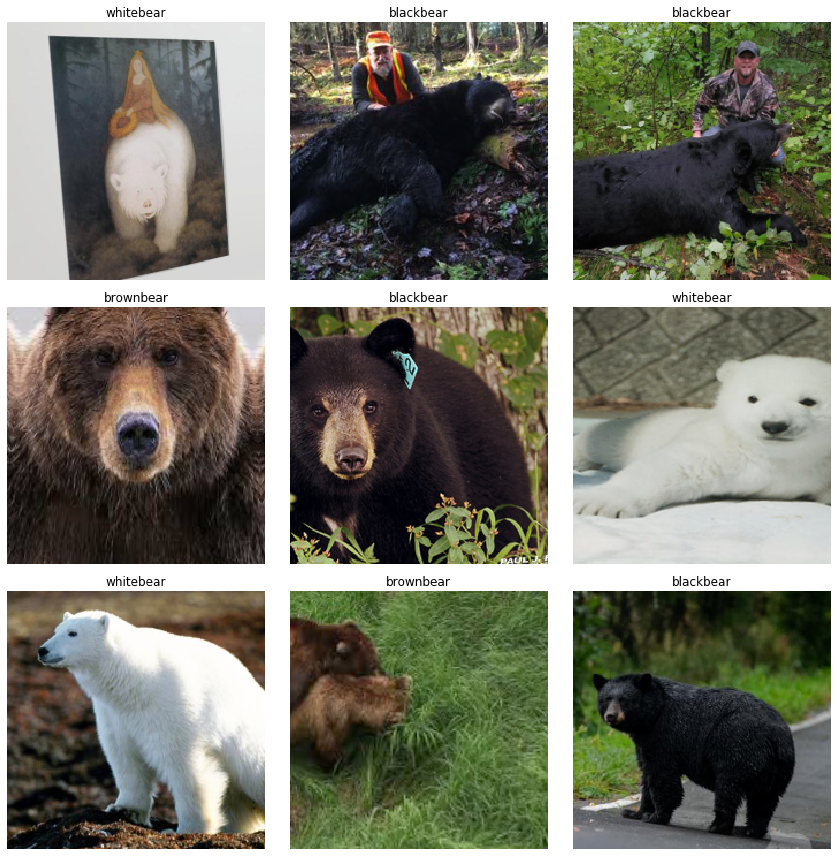

In [0]:
data.show_batch(rows=3) #shows random elements from our dataset

# 2. Set up model
    2.1 Choose model
    2.2 Choose metric
    2.3 Find hyperparameters 

In [0]:
from fastai.vision import cnn_learner
from fastai.metrics import accuracy

In [0]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['blackbear', 'brownbear', 'whitebear'], 3, 246, 61)

In [0]:
learner = cnn_learner(data, torchvision.models.resnet34, metrics=accuracy) #trains our dataset, we pass desired model (resnet34) & accuracy
#it downloads pretrained by imagenet model

# 3. Train the network

In [0]:
learner.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,1.678980,0.489098,0.868852,00:04
1,0.953467,0.619334,0.901639,00:03
2,0.695113,0.576566,0.918033,00:03
3,0.544789,0.517464,0.918033,00:03


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


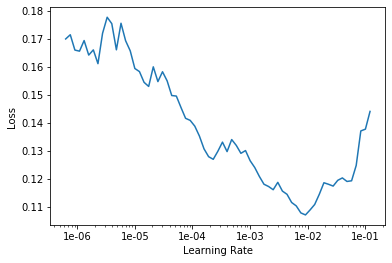

In [0]:
learner.lr_find() #lr is learning rate
learner.recorder.plot()

In [0]:
learner.fit_one_cycle(2, max_lr=slice(1e-06,1e-02))

epoch,train_loss,valid_loss,accuracy,time
0,0.156701,0.608452,0.950820,00:03
1,0.111614,0.625333,0.967213,00:03


# 4. Evaluate and analyze the results

In [0]:
from fastai.vision import ClassificationInterpretation

In [0]:
interp = ClassificationInterpretation.from_learner(learner) 

losses,idxs = interp.top_losses()

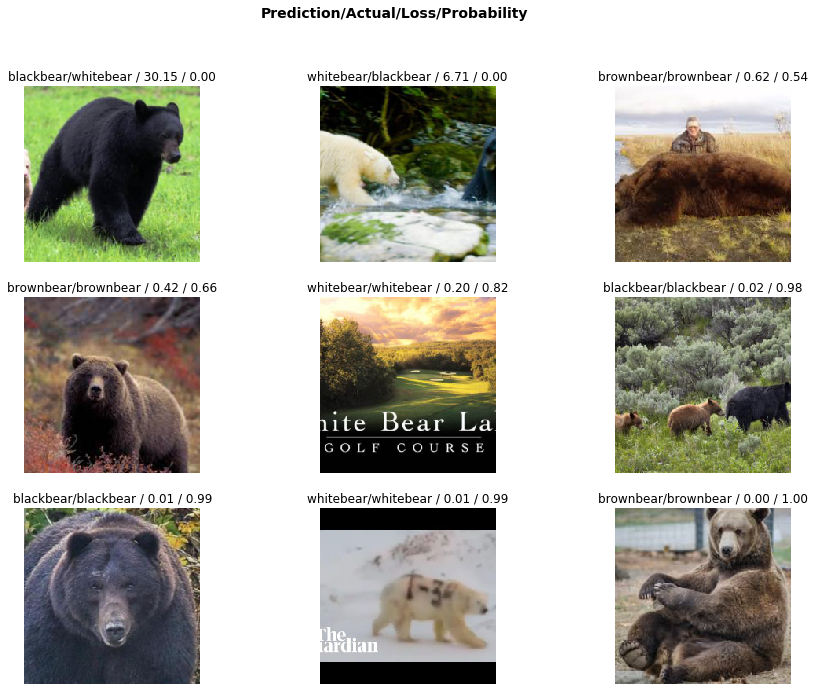

In [0]:
interp.plot_top_losses(9, figsize=(15,11))

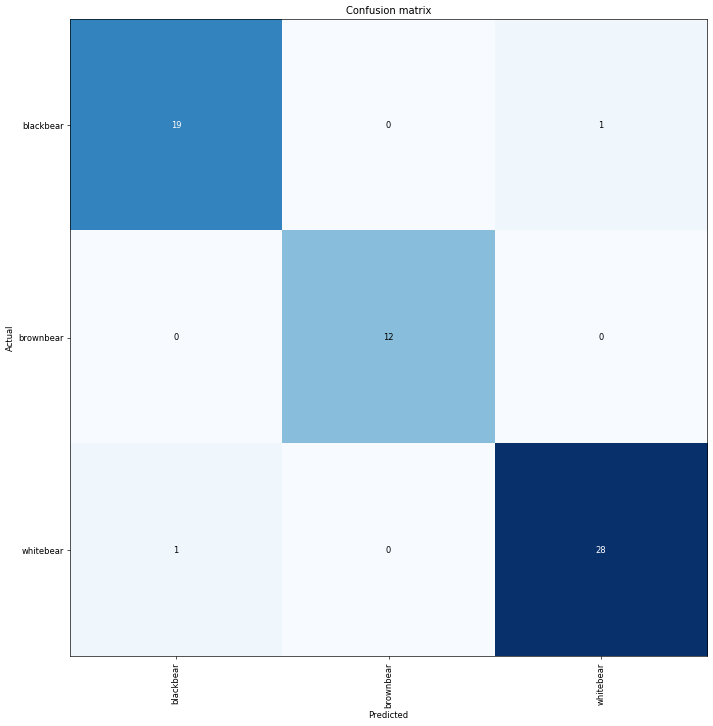

In [0]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [0]:
interp.most_confused(min_val=2)

[]

# 5. Using the model

In [0]:
learner.export()

In [0]:
img = open_image(path/'bur.jpg')

In [0]:
img2 = open_image(path/'chernyj-medved-1.jpg')

In [0]:
img3 = open_image(path/'Polar_Bear.jpg')

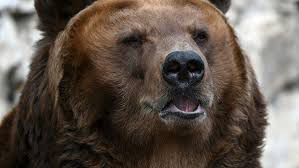

In [0]:
img

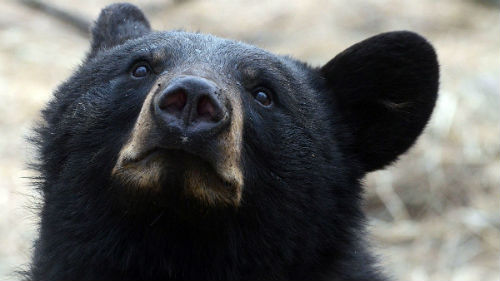

In [0]:
img2

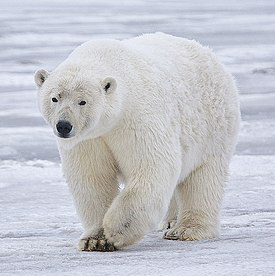

In [0]:
img3

In [0]:
learner = load_learner(path)

In [0]:
pred_class,pred_idx,outputs = learner.predict(img)
pred_class

Category brownbear

In [0]:
pred_class,pred_idx,outputs = learner.predict(img2)
pred_class

Category blackbear

In [0]:
pred_class,pred_idx,outputs = learner.predict(img3)
pred_class

Category whitebear